In [2]:
!pip install qiskit qiskit-aer matplotlib pylatexenc qiskit_ibm_runtime

qiskit_runtime_service._discover_account:WARNING:2026-01-07 15:20:30,855: Loading account with the given token. A saved account will not be used.
qiskit_runtime_service.__init__:WARNING:2026-01-07 15:20:33,828: Instance was not set at service instantiation. Free and trial plan instances will be prioritized. Based on the following filters: (tags: None, region: us-east, eu-de), and available plans: (open), the available account instances are: open-instance. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().


Measurement counts from IBM Quantum Computer:
{'00': 243, '01': 31, '10': 43, '11': 183}


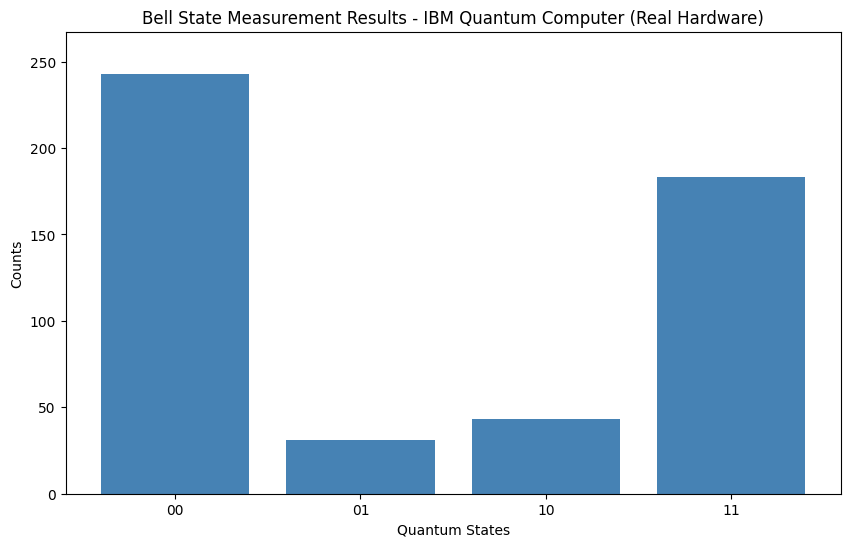

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
from collections import Counter
import matplotlib.pyplot as plt

service = QiskitRuntimeService(
    channel='ibm_quantum_platform',  # Debe ser 'ibm_quantum_platform' o 'ibm_cloud'
    token='TU_API_KEY_AQUI'
)

# Recuperar el job
job = service.job('d5eokif67pic7382agkg')
job_result = job.result()

# Extraer datos del resultado
data = job_result['results'][0]['data']
counts = data['c']

# Extract hexadecimal samples and convert to 2-bit binary
samples = counts.get('samples', [])
bitstrings = [format(int(s, 16), '02b') for s in samples]
counts_bin = Counter(bitstrings)

# Complete with zeros for missing states
all_states = [format(i, '02b') for i in range(4)]
full_counts = {state: counts_bin.get(state, 0) for state in all_states}

# Display results
print("Measurement counts from IBM Quantum Computer:")
print(full_counts)

# Display histogram of real job results (absolute counts) for all states
keys_full = all_states
values_full = [full_counts[k] for k in keys_full]
plt.figure(figsize=(10, 6))
plt.bar(keys_full, values_full, color='steelblue')
plt.xlabel('Quantum States')
plt.ylabel('Counts')
plt.title('Bell State Measurement Results - IBM Quantum Computer (Real Hardware)')
plt.ylim(0, max(values_full) * 1.1 if max(values_full) > 0 else 10)
plt.show()